In [1]:
from functions import *
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import shap
from collections import Counter

## Data Preprocessing

In [2]:
path_1 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/BHT1.csv"
path_2 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/BHT2.csv"
path_3 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/BHT3.csv"

BHT_1 = pd.read_csv(path_1, sep=';')
BHT_1.drop(columns=['Unnamed: 0'], inplace=True)
BHT_2 = pd.read_csv(path_2, sep=';')
BHT_2.drop(columns=['Unnamed: 0'], inplace=True)
BHT_3 = pd.read_csv(path_3, sep=',')
BHT_3.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
## set modules
module1 = ['M01_1_N', 'M02_1_N', 'M03_1_N', 'M04_1_N', 'M05_1_N', 'M06_1_N']

module2 = [
            'M01_2_N', 'M02_2_N', 'M03_2_N', 'M04_2_N', 'M05_2_N', 'M06_2_N',
            'M07_2_N', 'M08_2_N', 'M09_2_N', 'M10_2_N', 'M11_2_N', 'M12_2_N',]

module3 = ['M01_3_N', 'M02_3_N', 'M03_3_N', 'M04_3_N', 'M05_3_N', 'M06_3_N',
            'M07_3_N', 'M08_3_N', 'M09_3_N', 'M10_3_N', 'M11_3_N', 'M12_3_N',
            'M13_3_N', 'M14_3_N', 'M15_3_N', 'M16_3_N', 'M17_3_N']

### Train test split function

### Search Space / Param Grid 

In [4]:
from hyperopt import *
search_space = {
    'fit_intercept': hp.choice('fit_intercept', [True]),
    'solver': hp.choice('solver', ['liblinear', 'lbfgs']),
    'C': hp.uniform('C', 0.002, 0.01),
    'penalty': hp.choice('penalty', ['l2']),
    'class_weight':'balanced',
}

## BHT semester 1

In [5]:
hpo = ModelTrainer(random_state=42)

# Count occurrences of each unique value in the 'status' column
counter_1 = Counter(BHT_1['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_1[1]} | 0: {counter_1[0]}')
x, y = hpo.split_data(BHT_1, module1)

Quantity of Drop Out and Degree in THL-1: 
 1: 233 | 0: 28


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 44.94trial/s, best loss: -0.7209743954480797]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            03               03
	 actual 1            12               35

Model parameters:
{'C': 0.008729112940623443, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Balanced acc.: 62.23404%
Validation accuracy.: 71.69811%
Sensitivity score (for 1): 74.46809%
Specificity score (for 0): 50.00000%
F1 score.: 82.35294%
False prediction: 28.30189%

------------------------------------- Fold 2 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 44.01trial/s, best loss: -0.70564

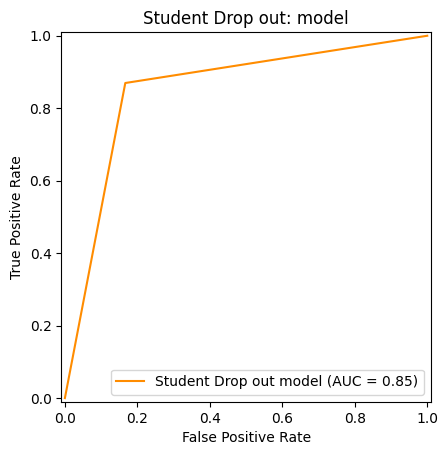

In [6]:
hpo = ModelTrainer(random_state=42)
model, feature_importance = hpo.cross_validation_hpo(
    x=x, y=y,
    search_space=search_space, 
    folds=5,
    algo='lr'
    )

In [7]:
feature_importance

,variable,coefficient
3,M04_1_N,0.196180
4,M05_1_N,0.140560
5,M06_1_N,0.097210
1,M02_1_N,0.067380
0,M01_1_N,-0.008650
2,M03_1_N,-0.024070


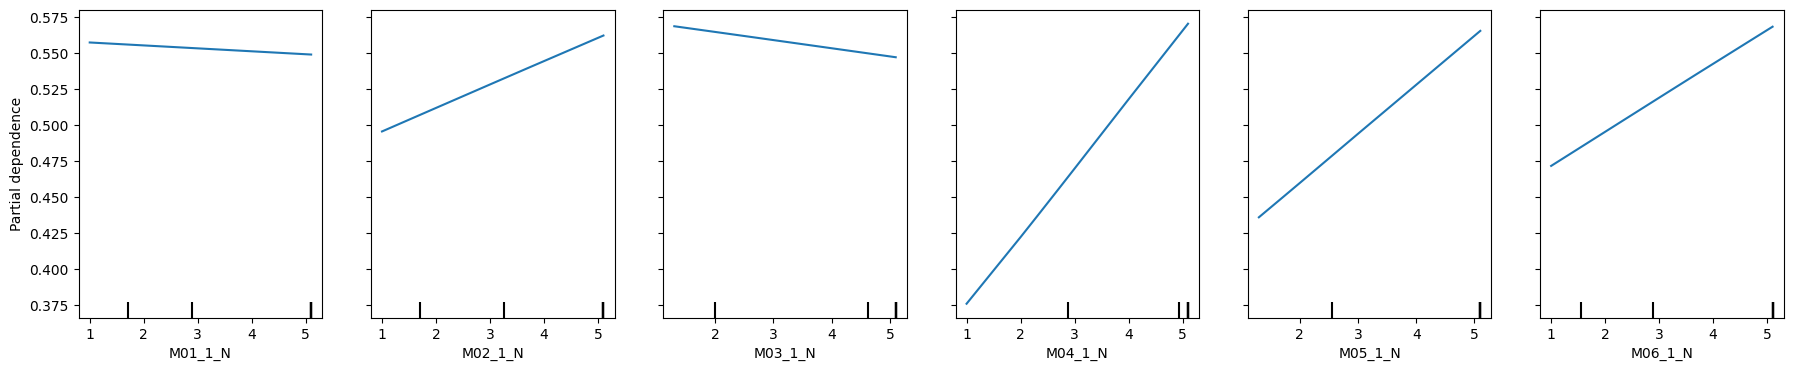

In [8]:
hpo.plot_partial_dependence(model=model, n_jobs=5, n_cols=6, size=1)

#### Shap analysis

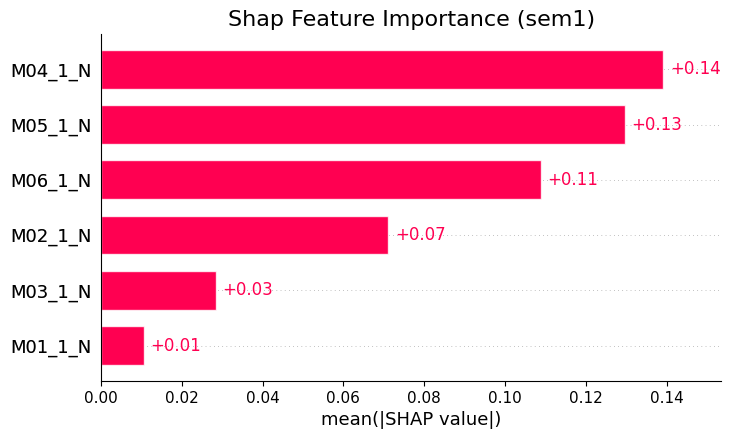

In [9]:
## Shap Global explainations
import shap
explainer = shap.Explainer(model['model'], model['x_train'])
shap_values = explainer(model['x_test'])

plt.title('Shap Feature Importance (sem1)', fontsize=16)
shap.plots.bar(shap_values)

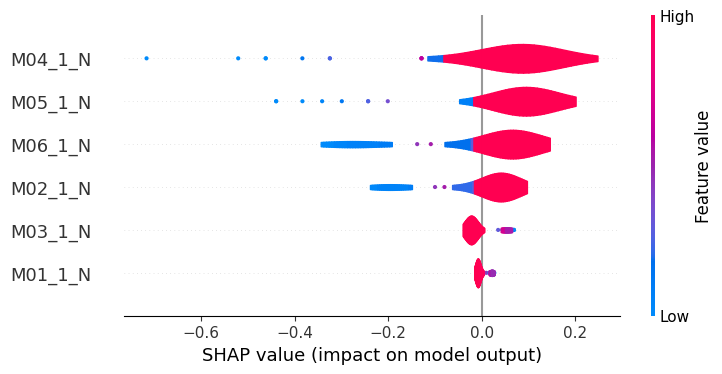

In [10]:
shap.plots.violin(shap_values, show=True)

In [11]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values, link='logit')

In [12]:
hpo.plot_shap_force(model=model, shap_values=shap_values, student_index=41, model_name='lr')

Student index 41 grades:
         grades
M01_1_N     1.7
M02_1_N     1.3
M03_1_N     2.0
M04_1_N     2.3
M05_1_N     2.3
M06_1_N     1.3
Status: 1, Prediction: [0], Probability [0]: 0.733, Probability [1]: 0.267


In [50]:
hpo.plot_shap_force(model=model, shap_values=shap_values, student_index=41, model_name='lr')

Student index 41 grades:
         grades
M01_1_N     1.7
M02_1_N     1.3
M03_1_N     2.0
M04_1_N     2.3
M05_1_N     2.3
M06_1_N     1.3
Status: 1, Prediction: [0], Probability [0]: 0.733, Probability [1]: 0.267


In [52]:
hpo.plot_shap_force(model=model, shap_values=shap_values, student_index=3, model_name='lr')

Student index 3 grades:
         grades
M01_1_N     5.1
M02_1_N     5.1
M03_1_N     2.0
M04_1_N     4.0
M05_1_N     5.1
M06_1_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.422, Probability [1]: 0.578


In [49]:
hpo.plot_shap_force(model=model, shap_values=shap_values, student_index=4, model_name='lr')

Student index 4 grades:
         grades
M01_1_N     1.7
M02_1_N     1.0
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     1.0
Status: 1, Prediction: [0], Probability [0]: 0.547, Probability [1]: 0.453


## BHT semester 2 

In [16]:
# Count occurrences of each unique value in the 'status' column
counter_2 = Counter(BHT_2['status'])
print(f'Quantity of Drop Out and Degree in THL-2: \n 1: {counter_2[1]} | 0: {counter_2[0]}')
hpo2 = ModelTrainer(random_state=72)
x2, y2 = hpo2.split_data(BHT_2, module2)

Quantity of Drop Out and Degree in THL-2: 
 1: 156 | 0: 27


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 50.66trial/s, best loss: -0.7838333333333333]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            01               04
	 actual 1            07               25

Model parameters:
{'C': 0.0076348060713935855, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Balanced acc.: 49.06250%
Validation accuracy.: 70.27027%
Sensitivity score (for 1): 78.12500%
Specificity score (for 0): 20.00000%
F1 score.: 81.96721%
False prediction: 29.72973%

------------------------------------- Fold 2 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 40.40trial/s, best loss: -0.74]


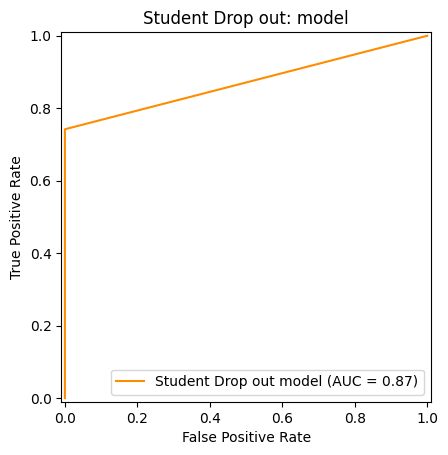

In [17]:
model_2, feature_importance_2 = hpo2.cross_validation_hpo(
    x=x2, y=y2,
    search_space=search_space, 
    folds=5,
    algo='lr'
    )

In [18]:
feature_importance_2

,variable,coefficient
10,M11_2_N,0.058290
8,M09_2_N,0.055550
3,M04_2_N,0.053610
4,M05_2_N,0.042150
7,M08_2_N,0.039380
6,M07_2_N,0.034970
9,M10_2_N,0.025810
5,M06_2_N,0.018980
1,M02_2_N,0.017950
0,M01_2_N,0.006090


#### Shap analysis

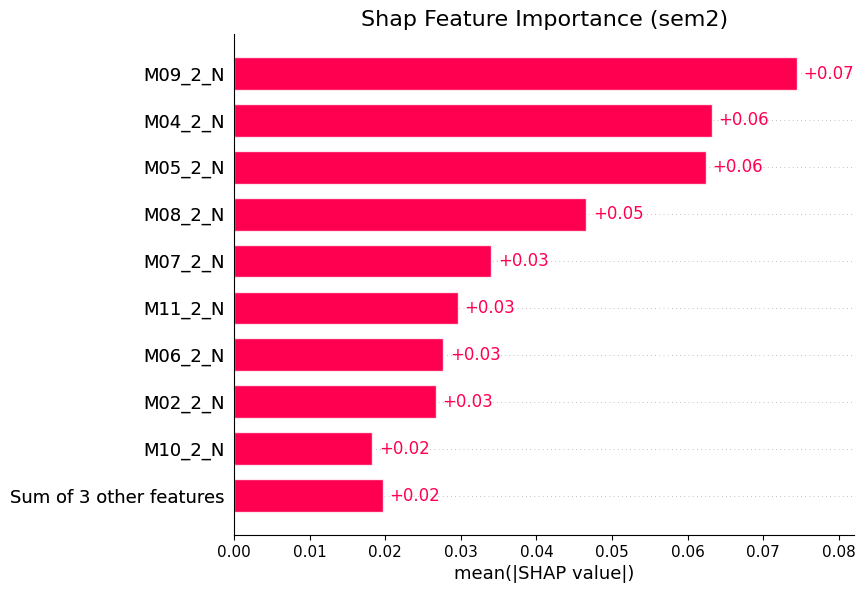

In [19]:
## Shap Global explainations
import shap
explainer2 = shap.Explainer(model_2['model'], model_2['x_train'])
shap_values2 = explainer2(model_2['x_test'])

plt.title('Shap Feature Importance (sem2)', fontsize=16)
shap.plots.bar(shap_values2)

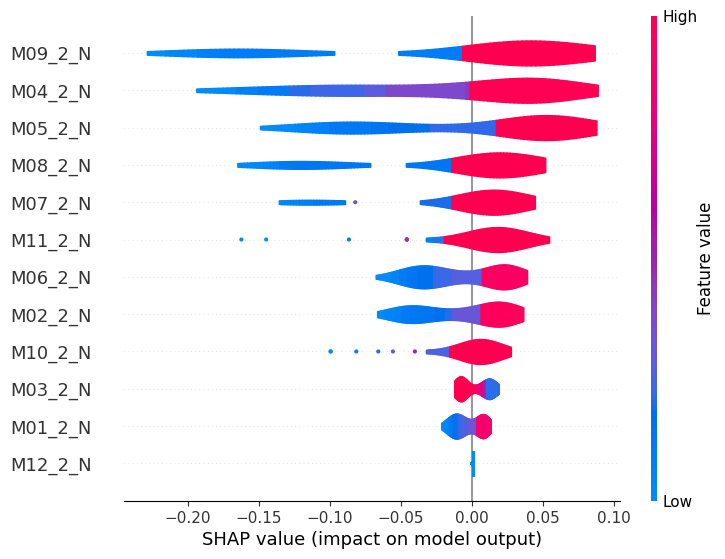

In [20]:
shap.plots.violin(shap_values2, show=True)

In [21]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values2, link='logit')

In [58]:
hpo2.plot_shap_force(model=model_2, shap_values=shap_values2, student_index=10, model_name='lr')

Student index 10 grades:
         grades
M01_2_N     1.0
M02_2_N     1.7
M03_2_N     1.0
M04_2_N     3.7
M05_2_N     1.7
M06_2_N     2.0
M07_2_N     1.3
M08_2_N     1.3
M09_2_N     1.0
M10_2_N     1.7
M11_2_N     2.0
M12_2_N     5.1
Status: 0, Prediction: [0], Probability [0]: 0.677, Probability [1]: 0.323


In [62]:
hpo2.plot_shap_force(model=model_2, shap_values=shap_values2, student_index=0, model_name='lr')

Student index 0 grades:
         grades
M01_2_N     1.3
M02_2_N     1.7
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     1.7
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.442, Probability [1]: 0.558


In [24]:
hpo2.plot_shap_force(model=model_2, shap_values=shap_values2, student_index=6, model_name='lr')

Student index 6 grades:
         grades
M01_2_N     1.0
M02_2_N     1.0
M03_2_N     1.3
M04_2_N     1.0
M05_2_N     5.1
M06_2_N     1.0
M07_2_N     1.7
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     1.0
M11_2_N     5.1
M12_2_N     5.1
Status: 0, Prediction: [0], Probability [0]: 0.554, Probability [1]: 0.446


In [25]:
hpo2.plot_shap_force(model=model_2, shap_values=shap_values2, student_index=10, model_name='lr')

Student index 10 grades:
         grades
M01_2_N     1.0
M02_2_N     1.7
M03_2_N     1.0
M04_2_N     3.7
M05_2_N     1.7
M06_2_N     2.0
M07_2_N     1.3
M08_2_N     1.3
M09_2_N     1.0
M10_2_N     1.7
M11_2_N     2.0
M12_2_N     5.1
Status: 0, Prediction: [0], Probability [0]: 0.677, Probability [1]: 0.323


## BHT semester 3

In [26]:
# Count occurrences of each unique value in the 'status' column
counter_3 = Counter(BHT_3['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_3[1]} | 0: {counter_3[0]}')
# Count occurrences of each unique value in the 'status' column
hpo3 = ModelTrainer(random_state=42)
x3, y3 = hpo3.split_data(BHT_3, module3)

Quantity of Drop Out and Degree in THL-1: 
 1: 114 | 0: 26


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 57.13trial/s, best loss: -0.817280701754386]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            05               00
	 actual 1            05               18

Model parameters:
{'C': 0.006565812698080519, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Balanced acc.: 89.13043%
Validation accuracy.: 82.14286%
Sensitivity score (for 1): 78.26087%
Specificity score (for 0): 100.00000%
F1 score.: 87.80488%
False prediction: 17.85714%

------------------------------------- Fold 2 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 51.51trial/s, best loss: -0.84172

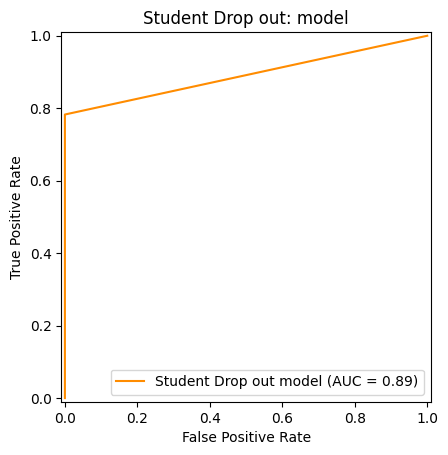

In [27]:
model_3, feature_importance_3 = hpo3.cross_validation_hpo(
    x=x3, y=y3,
    search_space=search_space, 
    folds=5,
    algo='lr'
    )

In [28]:
feature_importance_3

,variable,coefficient
8,M09_3_N,0.144180
9,M10_3_N,0.104340
13,M14_3_N,0.102520
14,M15_3_N,0.100620
7,M08_3_N,0.091100
1,M02_3_N,0.080080
12,M13_3_N,0.078280
3,M04_3_N,0.061490
10,M11_3_N,0.050130
4,M05_3_N,0.039490


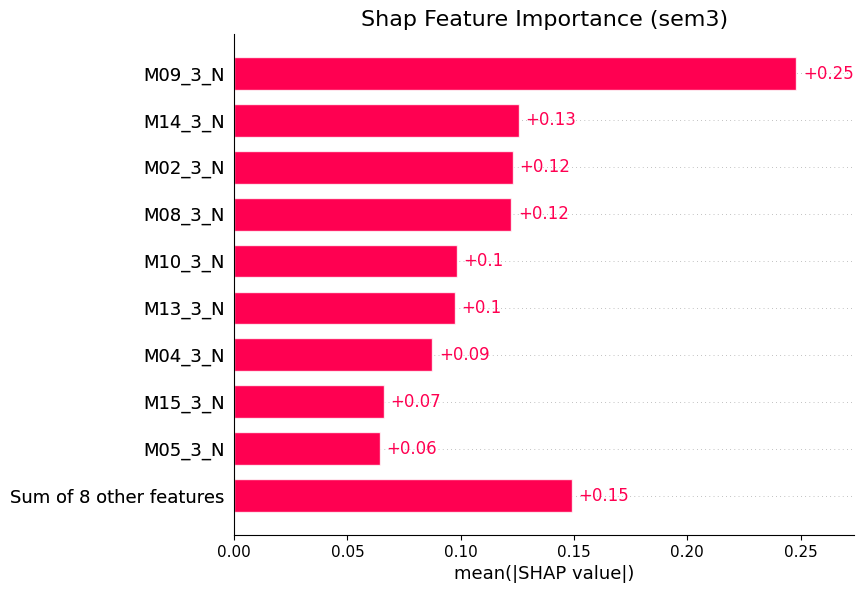

In [29]:
## Shap Global explainations
import shap
explainer3 = shap.Explainer(model_3['model'], model_3['x_train'])
shap_values3 = explainer3(model_3['x_test'])

plt.title('Shap Feature Importance (sem3)', fontsize=16)
shap.plots.bar(shap_values3)

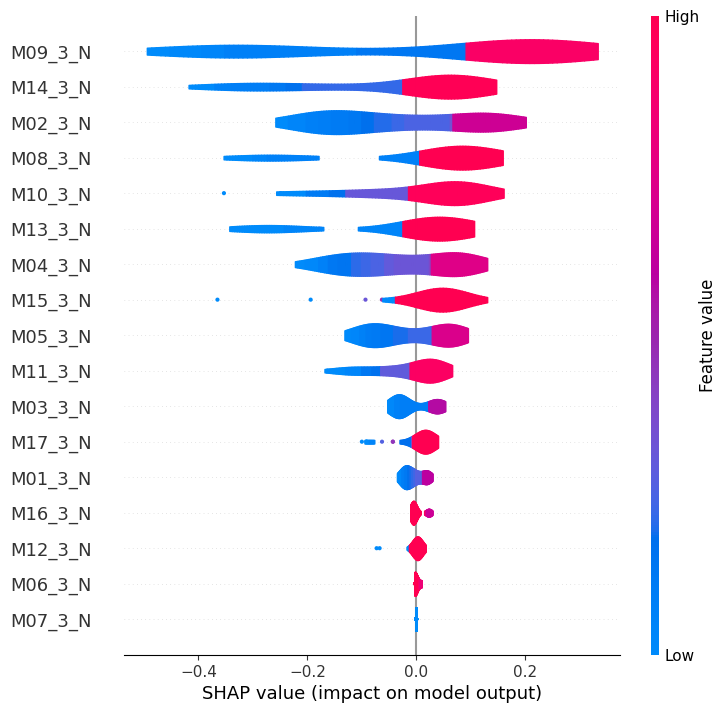

In [30]:
shap.plots.violin(shap_values3, show=True)

In [31]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values3, link='logit')

In [32]:
hpo3.plot_shap_force(model=model_3, shap_values=shap_values3, student_index=1, model_name='lr')

Student index 1 grades:
         grades
M01_3_N     1.7
M02_3_N     1.0
M03_3_N     1.0
M04_3_N     2.7
M05_3_N     1.0
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     5.1
M10_3_N     5.1
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.351, Probability [1]: 0.649


In [63]:
hpo3.plot_shap_force(model=model_3, shap_values=shap_values3, student_index=4, model_name='lr')

Student index 4 grades:
         grades
M01_3_N     1.0
M02_3_N     1.7
M03_3_N     1.3
M04_3_N     1.0
M05_3_N     1.0
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     1.0
M09_3_N     1.0
M10_3_N     2.3
M11_3_N     2.0
M12_3_N     5.1
M13_3_N     1.0
M14_3_N     1.3
M15_3_N     1.0
M16_3_N     1.0
M17_3_N     1.3
Status: 0, Prediction: [0], Probability [0]: 0.886, Probability [1]: 0.114


In [34]:
hpo3.plot_shap_force(model=model_3, shap_values=shap_values3, student_index=3, model_name='lr')

Student index 3 grades:
         grades
M01_3_N     2.3
M02_3_N     1.7
M03_3_N     1.7
M04_3_N     5.0
M05_3_N     2.0
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     2.0
M10_3_N     5.1
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.395, Probability [1]: 0.605


In [35]:
hpo3.plot_shap_force(model=model_3, shap_values=shap_values3, student_index=10, model_name='lr')

Student index 10 grades:
         grades
M01_3_N     2.0
M02_3_N     2.3
M03_3_N     1.7
M04_3_N     3.0
M05_3_N     2.7
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     1.7
M09_3_N     1.3
M10_3_N     4.0
M11_3_N     3.3
M12_3_N     5.1
M13_3_N     1.0
M14_3_N     1.7
M15_3_N     2.7
M16_3_N     1.0
M17_3_N     5.0
Status: 0, Prediction: [0], Probability [0]: 0.755, Probability [1]: 0.245
